Name: Felix Mburu Njoroge

DSF-PT06

**Background:**

Vaccination is a key public health measure to fight infectious diseases. Vaccines provide immunization for individuals and enough vaccination in a community can reduce further spread of a diseases through herd immunity.

The H1N1 influenza virus also known as "swine flu" spread across the world in 2009 and was responsible for between 151,000 and 575,000 deaths globally. A vaccine for the H1N1 became publicly available in late 2009 and a survey dubbed "National 2009 H1N1 Flu Survey" was conducted.

This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

Stakeholder: **Public Health Officials**

***Objectives***

**1. Predict Vaccination Uptake Based on Demographic and Socioeconomic Factors:**

Objective: Identify the strongest predictors of H1N1 vaccination uptake using demographic (age, gender, race) and socioeconomic (income, education level) data.

Purpose: Focus public health efforts on demographic groups with lower predicted vaccination rates to enhance targeted outreach and intervention programs.

**2. Forecast Future Vaccination Rates:**

Objective: Use current vaccination rates and demographic data to predict future vaccination trends for H1N1.

Purpose: Ensure adequate planning for vaccine supply and distribution by forecasting areas and populations that may require more resources or targeted campaigns.


**3. Analyze the Impact of Public Perceptions on Vaccination Behavior:**

Objective: Assess how respondents' perceptions of illness risks and vaccine effectiveness predict their likelihood of getting vaccinated.

Purpose: Develop and refine public health messaging to address specific misconceptions and improve overall vaccination rates by tailoring communication strategies to public concerns.


**4. Evaluate the Effectiveness of Preventive Behaviors on Vaccination Rates:**

Objective: Predict how various preventive behaviors (e.g., handwashing, avoiding crowds) correlate with vaccination status and uptake.

Purpose: Integrate behavioral insights into public health strategies to promote both vaccination and complementary preventive measures, ensuring a comprehensive approach to disease prevention.

# 1. DATA PREPARATION

Data preparation will involve importing the necessary libraries, loading the data, data cleaning which involved dealing with null values, outliers and duplicates then encoding the data.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Load the dataset into a data frame 'df'
df = pd.read_csv("/content/H1N1_Flu_Vaccines.csv")

# Display the first few rows of the dataset
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.00,0.00,NaN,NaN,0,0
1,1,3.00,2.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.00,0.00,pxcmvdjn,xgwztkwe,0,1
2,2,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.00,0.00,rucpziij,xtkaffoo,0,0
3,3,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.00,0.00,NaN,NaN,0,1
4,4,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.00,0.00,wxleyezf,emcorrxb,0,0


DATA OVERVIEW

In [ ]:
#data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
#summary statistics
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.00,26615.00,26591.00,26636.00,26499.00,26688.00,26665.00,26620.00,26625.00,26579.00,...,26316.00,26319.00,26312.00,26245.00,26193.00,26170.00,26458.00,26458.00,26707.00,26707.00
mean,13353.00,1.62,1.26,0.05,0.73,0.07,0.83,0.36,0.34,0.68,...,3.85,2.34,2.36,4.03,2.72,2.12,0.89,0.53,0.21,0.47
std,7709.79,0.91,0.62,0.22,0.45,0.25,0.38,0.48,0.47,0.47,...,1.01,1.29,1.36,1.09,1.39,1.33,0.75,0.93,0.41,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,6676.50,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,3.00,1.00,1.00,4.00,2.00,1.00,0.00,0.00,0.00,0.00
50%,13353.00,2.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,...,4.00,2.00,2.00,4.00,2.00,2.00,1.00,0.00,0.00,0.00
75%,20029.50,2.00,2.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,...,5.00,4.00,4.00,5.00,4.00,4.00,1.00,1.00,0.00,1.00
max,26706.00,3.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,5.00,5.00,5.00,5.00,5.00,5.00,3.00,3.00,1.00,1.00


#2.  DATA CLEANING

a)  **Missing values**

In [3]:
# Check for missing values
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [4]:
#check percentage of missing values
# create a function to check the percentage of missing values
def missing_values(data):
    miss = data.isnull().sum().sort_values(ascending = False)
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)
    return missing

missing_data = missing_values(df)
missing_data

,index,Missing Values,Percentage
0,employment_occupation,13470,0.50
1,employment_industry,13330,0.50
2,health_insurance,12274,0.46
3,income_poverty,4423,0.17
4,doctor_recc_h1n1,2160,0.08
5,doctor_recc_seasonal,2160,0.08
6,rent_or_own,2042,0.08
7,employment_status,1463,0.05
8,marital_status,1408,0.05
9,education,1407,0.05


**Overview of missing values:**

The columns employment_industry, employment_occupation and health_insurance have a high number of missing values and these columns should thus be dropped.

The other columns have a relatively small percentage of missing values so we'll just drop the rows with missing values.

This approach is so as to maintain data integrity; which is not always the case with imputing.

In [5]:
# Drop columns with high percentage of missing values
df.drop(columns=['employment_industry', 'employment_occupation', 'health_insurance'], inplace=True)

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

In [7]:
# Verify that there are no more missing values
print(df.isnull().sum().sum())  # Should print 0

# Get the shape of the cleaned data
print(df.shape)

# Display the first few rows of the cleaned data
df.head()

0
(19642, 35)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.00,0.00,0,0
1,1,3.00,2.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.00,0.00,0,1
3,3,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.00,0.00,0,1
4,4,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.00,0.00,0,0
5,5,3.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.00,3.00,0,0


In [8]:
# we can also drop the respondent_id column since it does not add value to the analysis

df.drop(columns=['respondent_id'], inplace=True)

b) **We'll not check for outliers** since the data is mainly categorical variables

c) **Checking duplicated columns**

In [9]:
df.duplicated()

0        False
1        False
3        False
4        False
5        False
         ...  
26700    False
26701    False
26702    False
26703    False
26706    False
Length: 19642, dtype: bool

There are no duplicates

d) **Data types**

Ensuring all columns are of the correct data type.

In [ ]:
# Check current data types of all columns
df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status           

In [10]:
# Convert all float columns to integers
df = df.apply(lambda x: x.astype(int) if x.dtype == 'float' else x)

# Verify the conversion
print(df.dtypes)

# Verify the data types
df.dtypes

h1n1_concern                    int64
h1n1_knowledge                  int64
behavioral_antiviral_meds       int64
behavioral_avoidance            int64
behavioral_face_mask            int64
behavioral_wash_hands           int64
behavioral_large_gatherings     int64
behavioral_outside_home         int64
behavioral_touch_face           int64
doctor_recc_h1n1                int64
doctor_recc_seasonal            int64
chronic_med_condition           int64
child_under_6_months            int64
health_worker                   int64
opinion_h1n1_vacc_effective     int64
opinion_h1n1_risk               int64
opinion_h1n1_sick_from_vacc     int64
opinion_seas_vacc_effective     int64
opinion_seas_risk               int64
opinion_seas_sick_from_vacc     int64
age_group                      object
education                      object
race                           object
sex                            object
income_poverty                 object
marital_status                 object
rent_or_own 

h1n1_concern                    int64
h1n1_knowledge                  int64
behavioral_antiviral_meds       int64
behavioral_avoidance            int64
behavioral_face_mask            int64
behavioral_wash_hands           int64
behavioral_large_gatherings     int64
behavioral_outside_home         int64
behavioral_touch_face           int64
doctor_recc_h1n1                int64
doctor_recc_seasonal            int64
chronic_med_condition           int64
child_under_6_months            int64
health_worker                   int64
opinion_h1n1_vacc_effective     int64
opinion_h1n1_risk               int64
opinion_h1n1_sick_from_vacc     int64
opinion_seas_vacc_effective     int64
opinion_seas_risk               int64
opinion_seas_sick_from_vacc     int64
age_group                      object
education                      object
race                           object
sex                            object
income_poverty                 object
marital_status                 object
rent_or_own 

In [ ]:
#checking the number of unique values in each column
# Iterate over each column and print unique values
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values ({len(unique_values)}): {unique_values}")
    print("-" * 50)

Column: h1n1_concern
Unique values (4): [1 3 2 0]
--------------------------------------------------
Column: h1n1_knowledge
Unique values (3): [0 2 1]
--------------------------------------------------
Column: behavioral_antiviral_meds
Unique values (2): [0 1]
--------------------------------------------------
Column: behavioral_avoidance
Unique values (2): [0 1]
--------------------------------------------------
Column: behavioral_face_mask
Unique values (2): [0 1]
--------------------------------------------------
Column: behavioral_wash_hands
Unique values (2): [0 1]
--------------------------------------------------
Column: behavioral_large_gatherings
Unique values (2): [0 1]
--------------------------------------------------
Column: behavioral_outside_home
Unique values (2): [1 0]
--------------------------------------------------
Column: behavioral_touch_face
Unique values (2): [1 0]
--------------------------------------------------
Column: doctor_recc_h1n1
Unique values (2): [0

# 3. EXPLORATORY DATA ANALYSIS (EDA)

**Univariate descriptive Analysis**

In [ ]:
# descriptive statistics of outcome variables
# Select the columns of interest
vaccine_data = df[['h1n1_vaccine']]

# Calculate descriptive statistics
stats = vaccine_data.describe()

# Print the statistics
print(stats)

       h1n1_vaccine
count      19642.00
mean           0.23
std            0.42
min            0.00
25%            0.00
50%            0.00
75%            0.00
max            1.00


In [ ]:
# Exploring the percentage breakdown of the two classes
df['h1n1_vaccine'].value_counts(normalize=True)

h1n1_vaccine
0   0.77
1   0.23
Name: proportion, dtype: float64

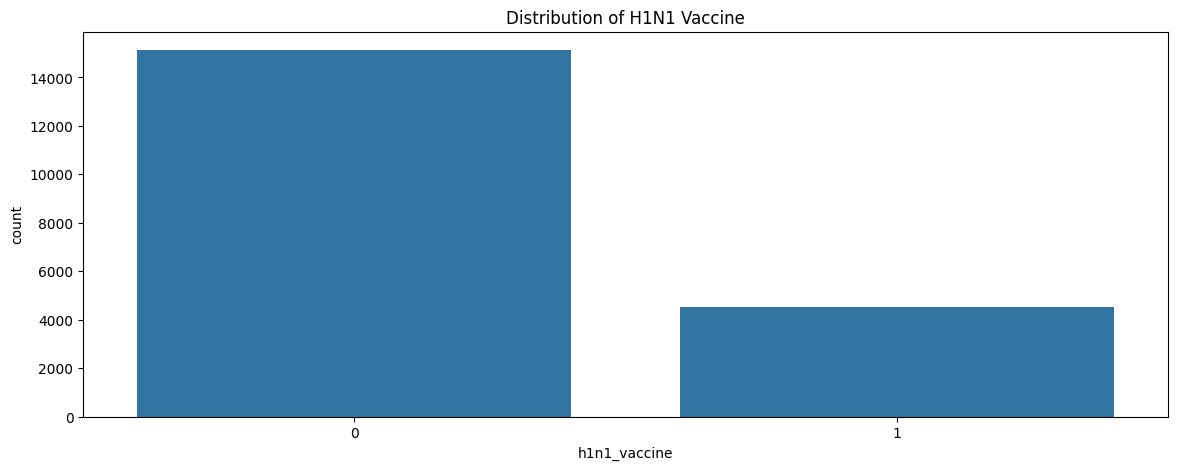

In [ ]:
# visualizing the distribution of outcome variable h1n1_vaccine

fig, ax = plt.subplots(1, figsize=(14, 5))

sns.countplot(data=df, x='h1n1_vaccine', ax=ax)
ax.set_title('Distribution of H1N1 Vaccine')

plt.show()

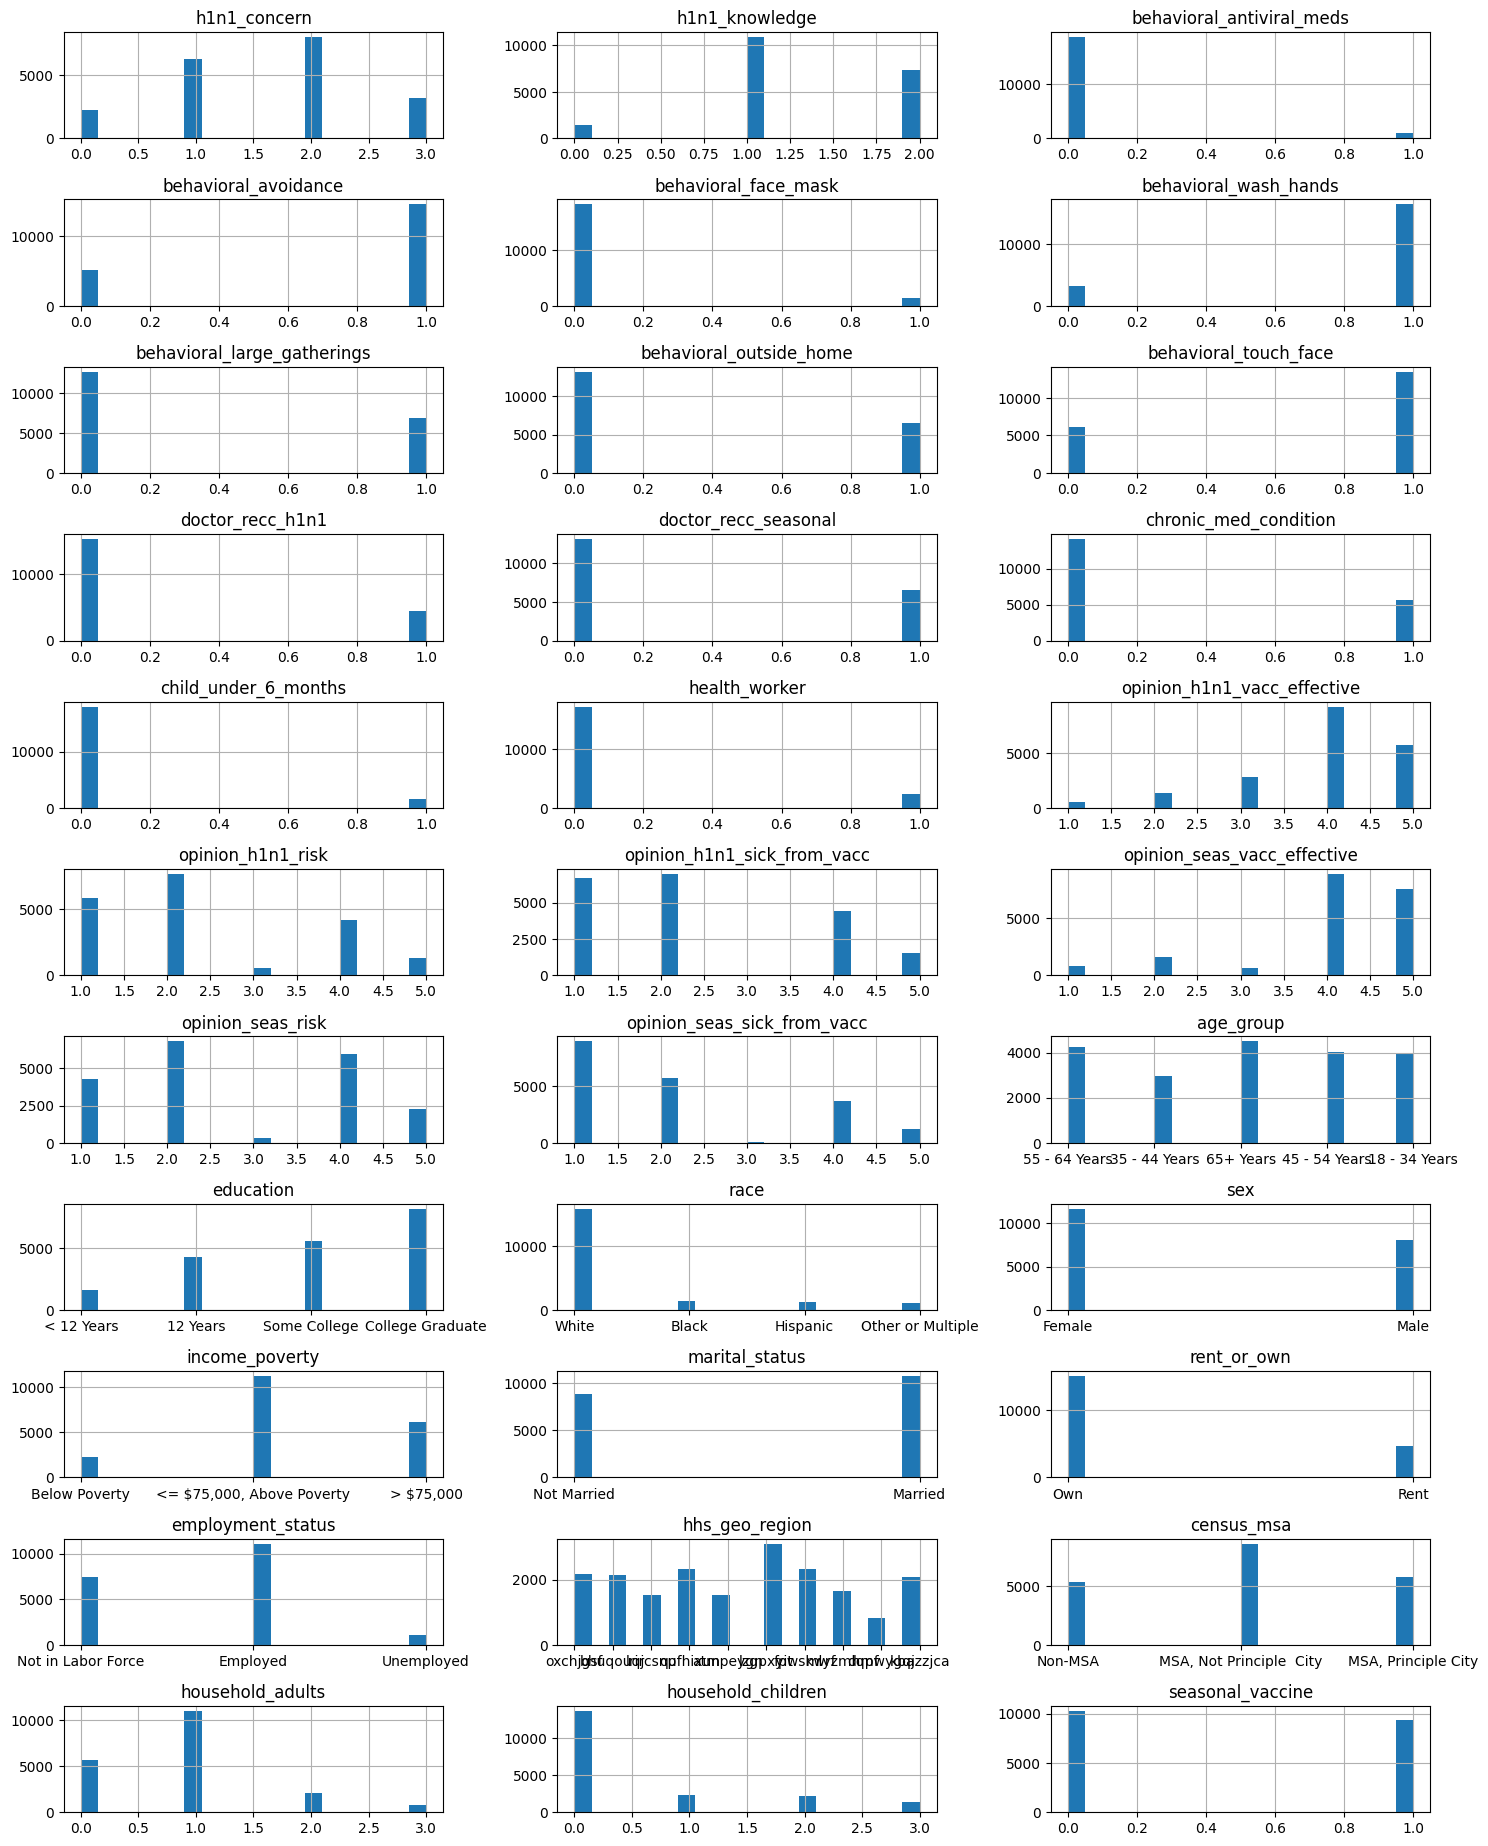

In [ ]:
#distribution of the other variables i.e. independent variables
# Get a list of columns to plot
columns_to_plot = [col for col in df.columns if col not in ['h1n1_vaccine']]

# Set up the figure and axis
fig, axes = plt.subplots(nrows=len(columns_to_plot) // 3 + 1, ncols=3, figsize=(15, 20))

# Flatten the axes if needed
if len(columns_to_plot) < 4:
    axes = axes.reshape(1, -1)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i // 3, i % 3]
    df[col].hist(ax=ax, bins=20)
    ax.set_title(col)

# Remove empty subplots
for i in range(len(columns_to_plot), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()

Relevant insights from univariate analysis:

- Only 23% of respondents had gotten the h1n1 vaccine. This points to a class imbalance problem

- Only 48% of respondents had gotten the seasonal vaccine

- The distributions of most predictor variables imbalanced which

**Bivariate Descriptive Analysis**

The analysis below entails plotting a bar plot to compare the proportions of people that got the h1n1 vaccine in the various categories.
The columns have been assessed 9 at a time to avoid computational overload

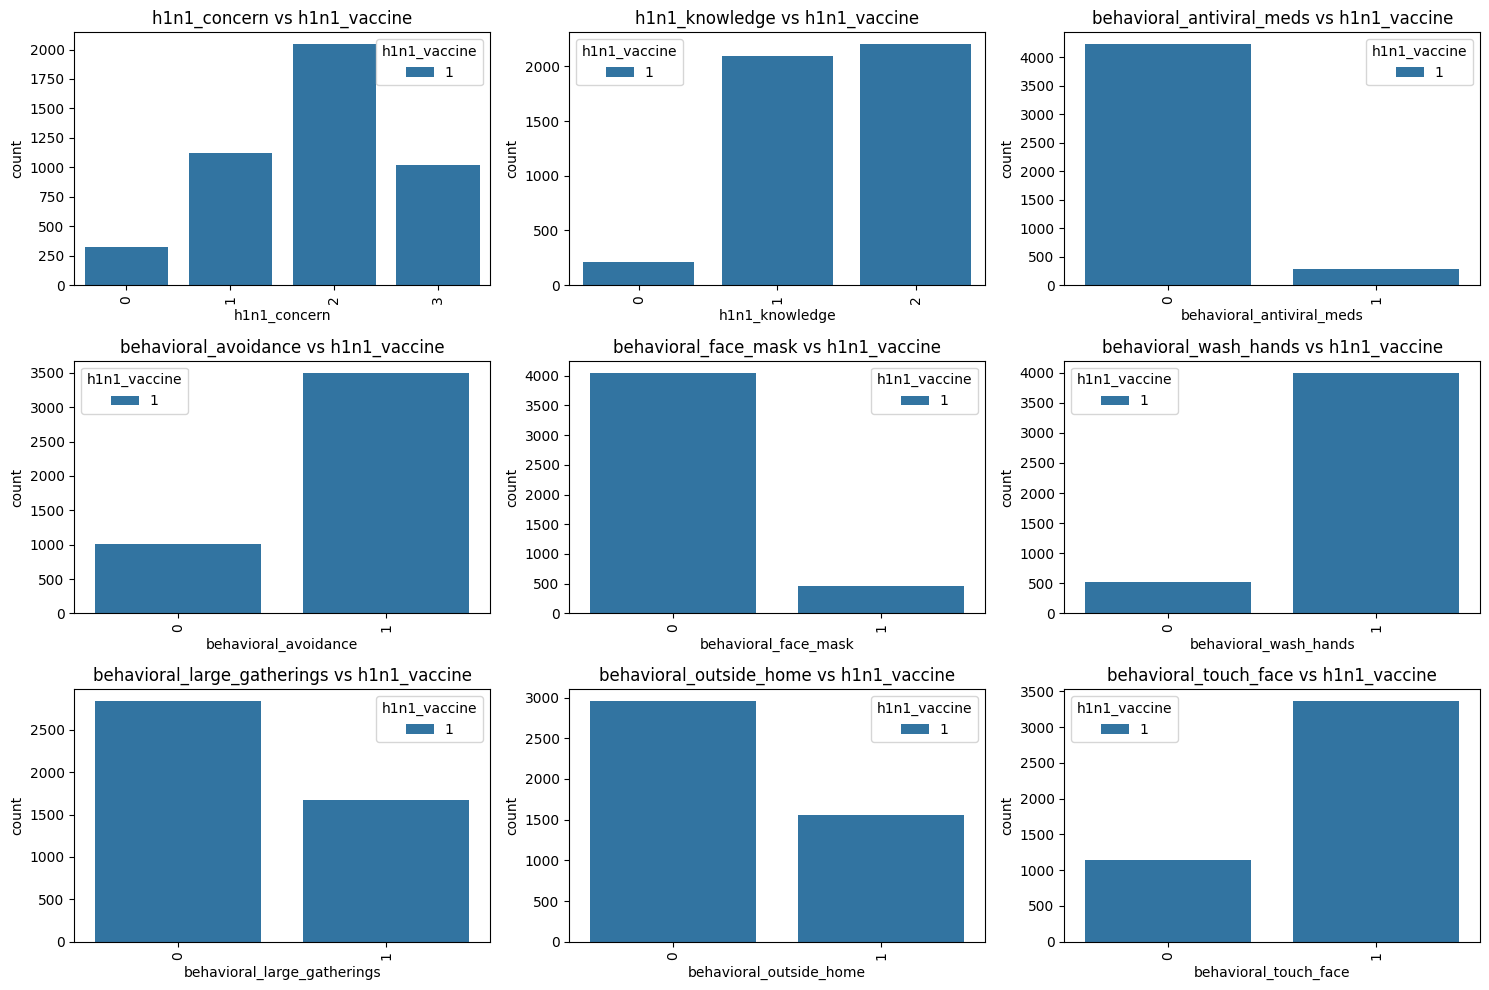

In [ ]:
# Filter the DataFrame for rows where 'h1n1_vaccine' is 1
df_h1n1_1 = df[df['h1n1_vaccine'] == 1]

# Plot for the target variable (h1n1_vaccine)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:9], 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df_h1n1_1[col], hue=df_h1n1_1['h1n1_vaccine'])
    plt.title(f'{col} vs h1n1_vaccine')
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

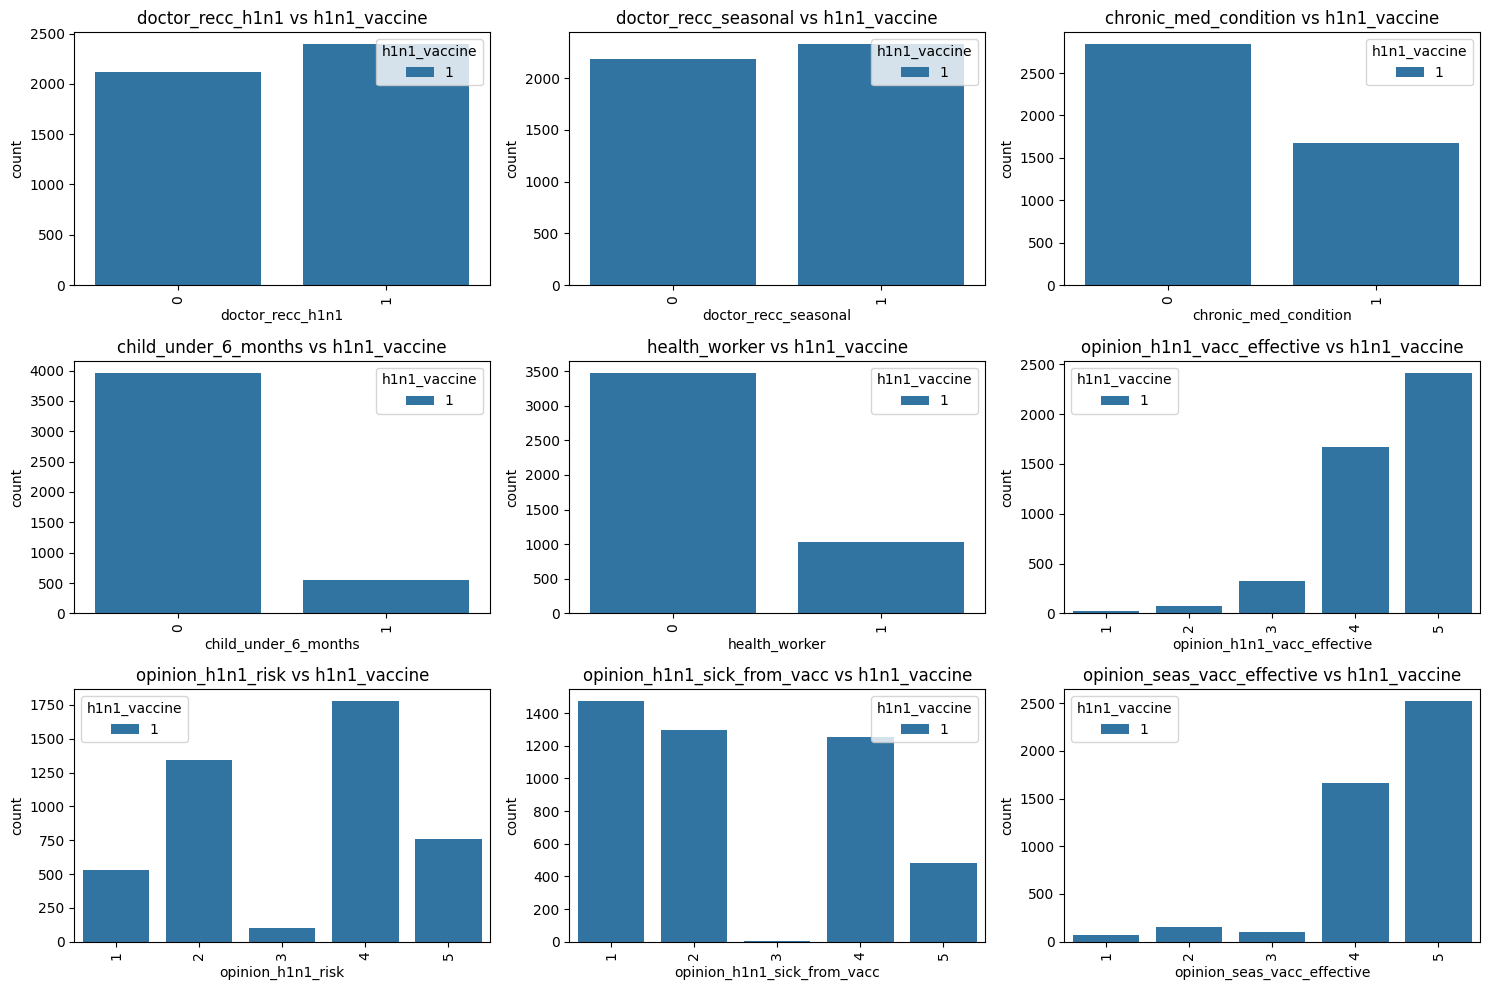

In [ ]:
# Plot for the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[9:18], 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df_h1n1_1[col], hue=df_h1n1_1['h1n1_vaccine'])
    plt.title(f'{col} vs h1n1_vaccine')
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

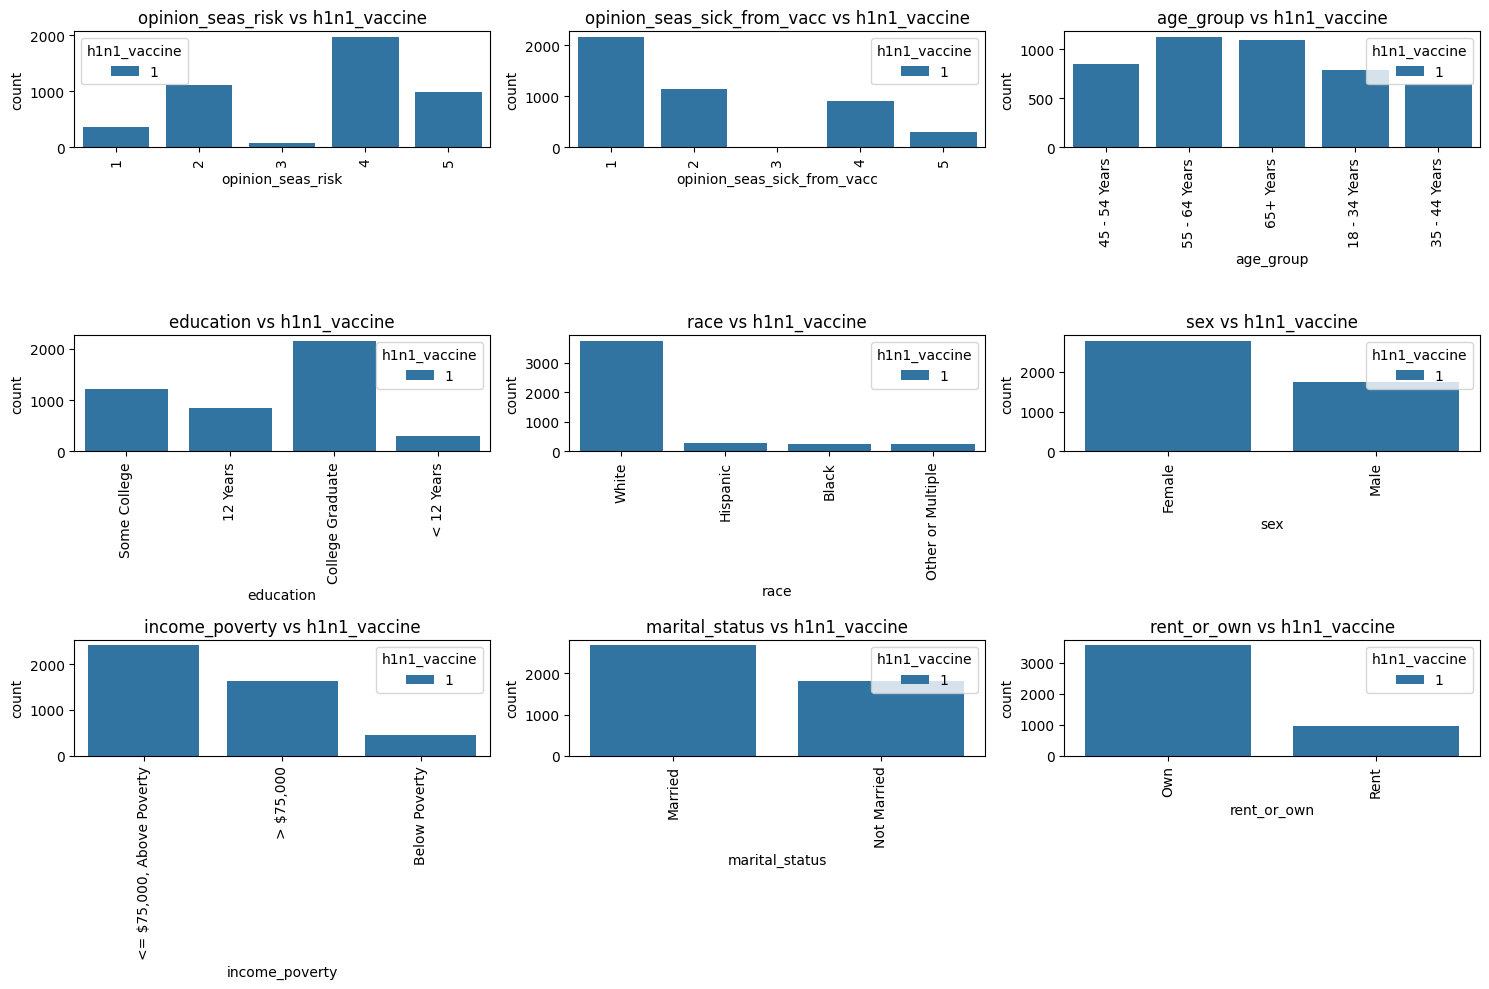

In [ ]:
# Plot for the target variable (h1n1_vaccine)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[18:27], 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df_h1n1_1[col], hue=df_h1n1_1['h1n1_vaccine'])
    plt.title(f'{col} vs h1n1_vaccine')
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

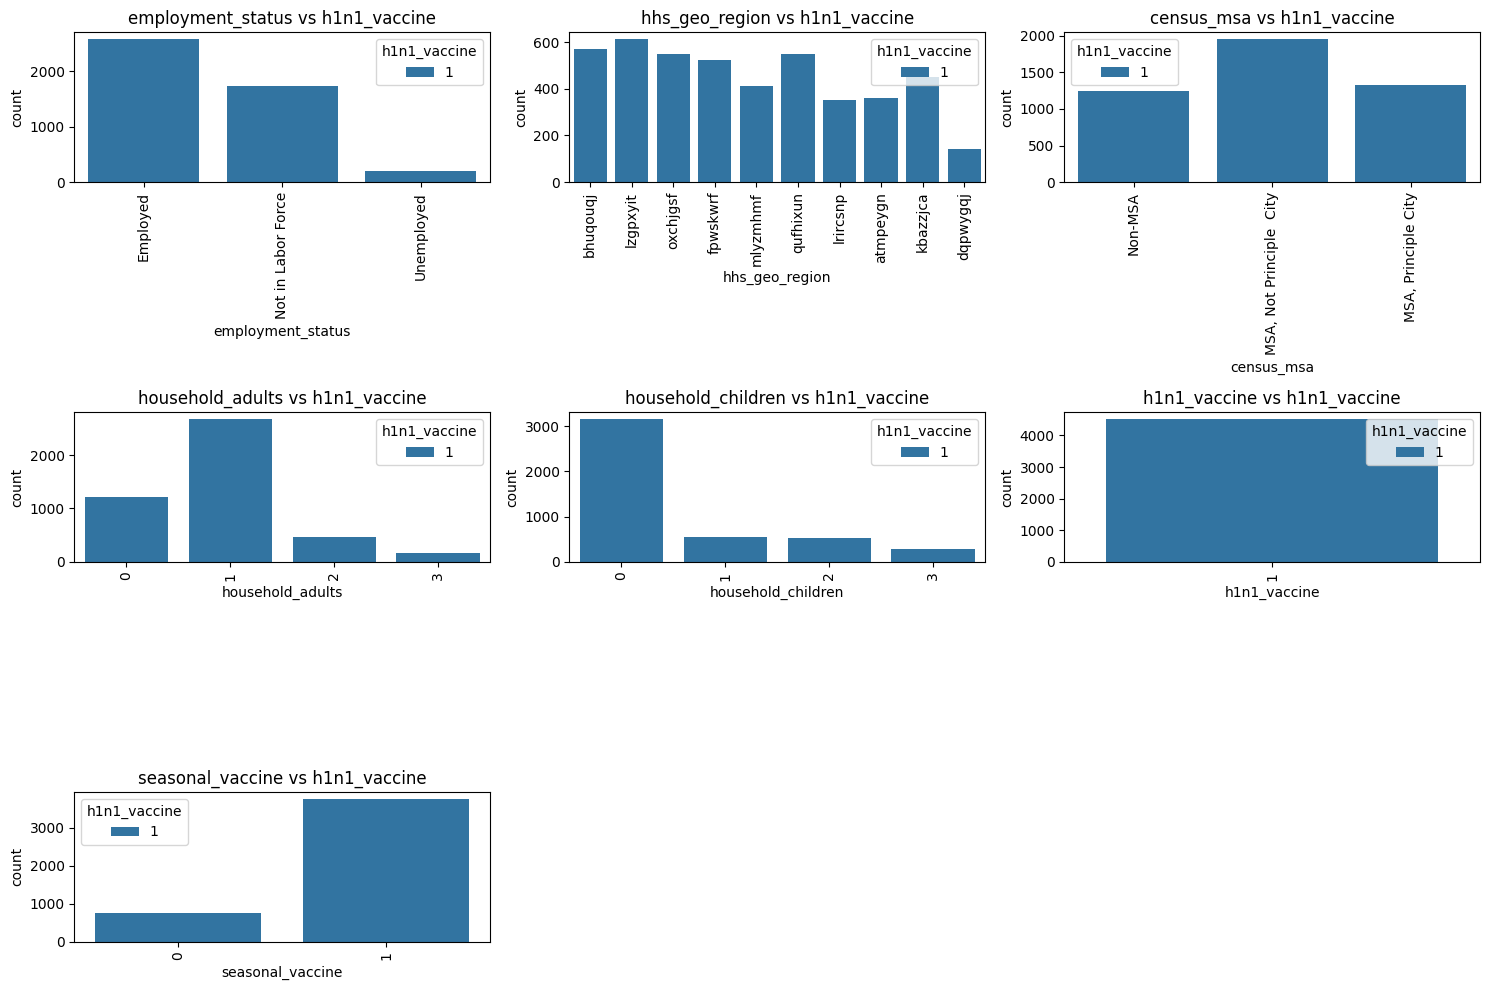

In [ ]:
# Plot for the target variable (h1n1_vaccine)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[27:35], 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df_h1n1_1[col], hue=df_h1n1_1['h1n1_vaccine'])
    plt.title(f'{col} vs h1n1_vaccine')
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

**Insights from bivariate descriptive analysis**:

***Higher proportion of uptake of h1n1 vaccine was observed in:***

Respondents with moderate h1n1_concern

Respondents with high h1n1 knowledge

Respondents with no behavioural antiviral med use

Respondents with behavioural avoidance

Respondents with no behavioural face mask use

Respondents with behavioural hand washing

Respondents with no behavioural large gathering

Respondents with no behavioural outside home

Respondents with behavioural touch face

Respondents with doctor recommendation for  seasonal vaccine

Respondents without chronic medical condition

Respondents without children under 6 months

Respondents who are not health workers

Respondents with very strong belief in effectiveness of h1n1 vaccine

Respondents with moderate risk belief in vaccine risk

Respondents with low opinion of sick from vaccine

Respondents with high opinion of seasonal vaccine effectiveness

Respondents with moderate opinion of seasonal vaccine risk

Respondents with low opinion of sickness from seasonal flu vaccine

Respondents with older age

Respondents who are college graduates

Respondents who are white

Respondents of female sex

Respondents above poverty

Respondents who are married

Respondents own houses

Respondents who are employed

Respondents who MSA is not principle city

Respondents with 1 household adult

Respondents with no household children

Respondents who’ve had seasonal vaccine


**Multivariate analysis using a correlation matrix**

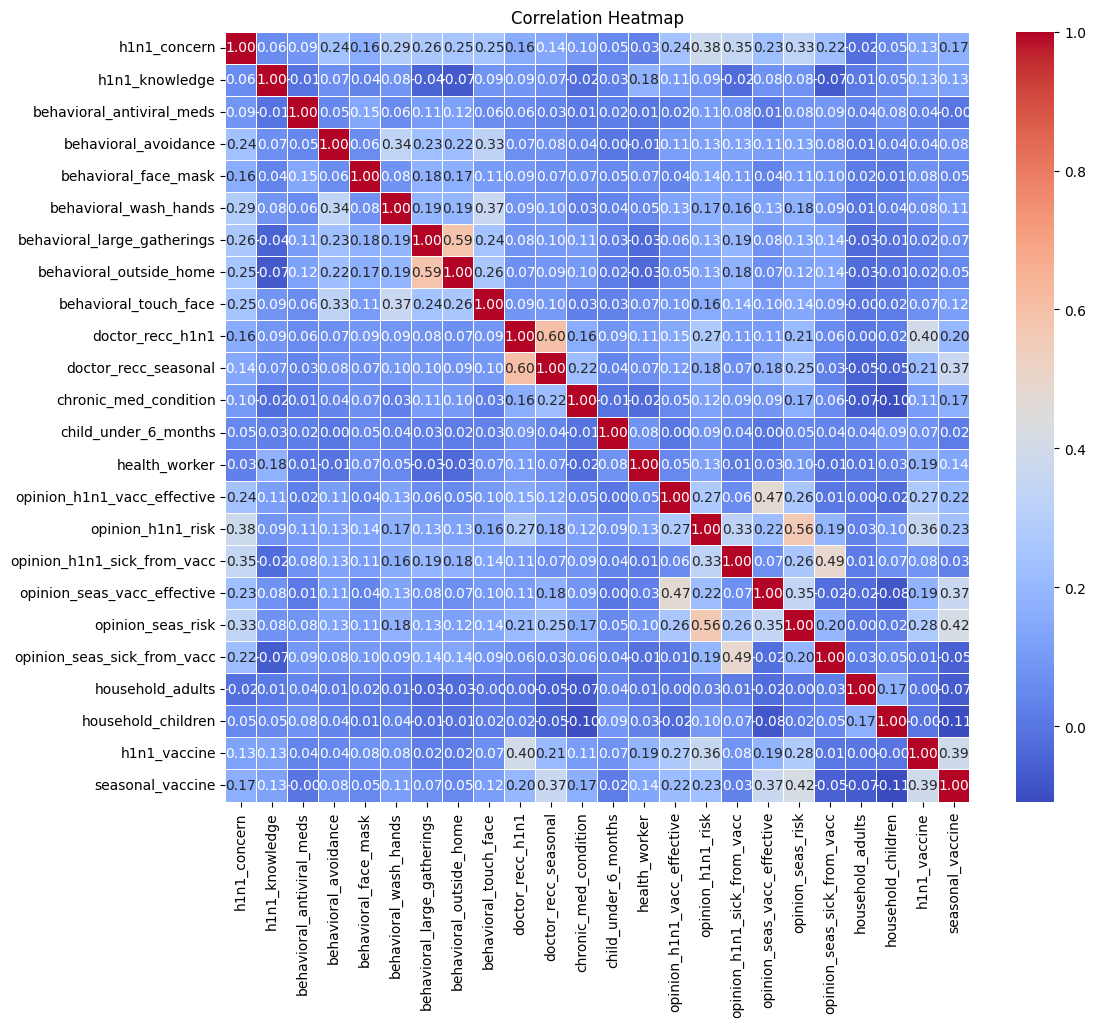

In [ ]:
# Select only the numeric columns for the correlation matrix
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Doctor recommendation and seasonal vaccine uptake appear to have the strongest correlation with h1n1 vaccine use.

# PREPROCESSING

One hot encoding

In [11]:
# List of categorical features excluding the target variable
categorical_features = [col for col in df.columns if col != 'h1n1_vaccine' and col != 'seasonal_vaccine']

# Perform one-hot encoding on all categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Verify the first few rows of the encoded data
df_encoded.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern_1,h1n1_concern_2,h1n1_concern_3,h1n1_knowledge_1,h1n1_knowledge_2,behavioral_antiviral_meds_1,behavioral_avoidance_1,behavioral_face_mask_1,...,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults_1,household_adults_2,household_adults_3,household_children_1,household_children_2,household_children_3
0,0,0,True,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,0,1,False,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1,True,False,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,False,True,False,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
5,0,0,False,False,True,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True


# Baseline Modelling and Preprocessing- Logistic regression

For this problem we'll use classification algorithms such as logistic regression, decision trees and K-Nearest Neighbor.

**LOGISTIC REGRESSION**

We'll start with logistic regression as our baseline model.
During EDA we observed **a class imbalance problem in the H1N1 vaccine class** which may lead to bias to the majority class, poor minority class performance and skewed decision boundaries.

**SMOTE (Synthetic Minority Over-sampling Technique)** is used to address class imbalance in datasets and will help balance the class distribution, improve minority class representation and enhance model generalization.

Model 1 **Train test split** applying SMOTE

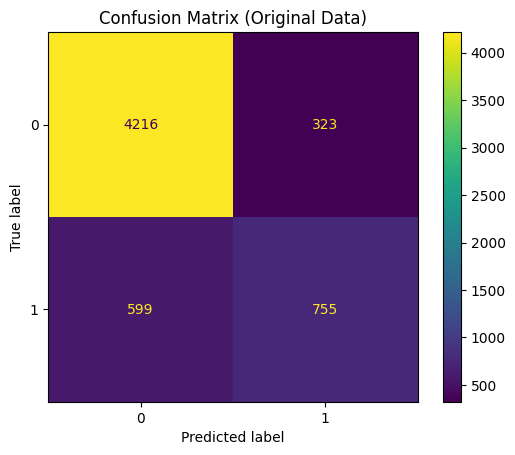

Class distribution before SMOTE:
h1n1_vaccine
0    10589
1     3160
Name: count, dtype: int64
Class distribution after SMOTE:
h1n1_vaccine
1    10589
0    10589
Name: count, dtype: int64


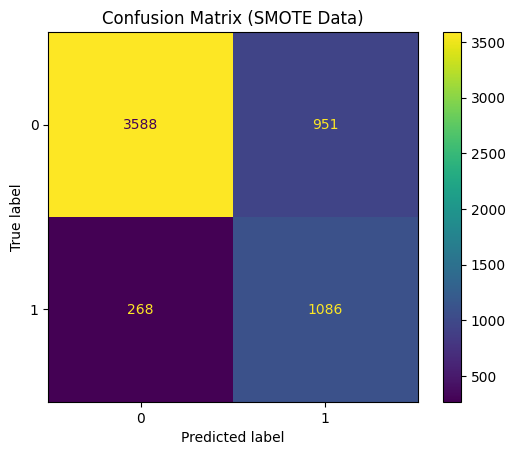

Confusion Matrix (SMOTE Data):
[[3588  951]
 [ 268 1086]]
Classification Report (SMOTE Data):
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      4539
           1       0.53      0.80      0.64      1354

    accuracy                           0.79      5893
   macro avg       0.73      0.80      0.75      5893
weighted avg       0.84      0.79      0.81      5893



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


# 'H1N1_vaccine' is the outcome variable
outcome_var = 'h1n1_vaccine'

# Define feature variables (X) and outcome variable (y)
X = df.drop(columns=[outcome_var])
y = df[outcome_var]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42, stratify=y)

# Train a logistic regression model on the original imbalanced data
model_original = LogisticRegression(solver='liblinear')
model_original.fit(X_train, y_train)

# Display confusion matrix for original data
ConfusionMatrixDisplay.from_estimator(estimator=model_original, X=X_test, y=y_test)
plt.title("Confusion Matrix (Original Data)")
plt.show()

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Train a logistic regression model on the SMOTE-resampled data
model_smote = LogisticRegression(solver='liblinear')
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test)

# Display confusion matrix for SMOTE data
ConfusionMatrixDisplay.from_estimator(estimator=model_smote, X=X_test, y=y_test)
plt.title("Confusion Matrix (SMOTE Data)")
plt.show()

# Evaluate the model trained on the SMOTE data
print("Confusion Matrix (SMOTE Data):")
print(confusion_matrix(y_test, y_pred_smote))
print("Classification Report (SMOTE Data):")
print(classification_report(y_test, y_pred_smote))

**K-fold cross validation**

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define your logistic regression model
model = LogisticRegression(solver='liblinear')

# Define custom scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Perform k-fold cross-validation on the SMOTE-resampled data
cv_results = cross_validate(model, X_train_smote, y_train_smote, cv=5, scoring=scoring)

# Print the cross-validation scores for each metric
print("Cross-validation scores:")
for metric in scoring.keys():
    scores = cv_results['test_' + metric]
    print(f"{metric.capitalize()}:", scores)
    print(f"Mean {metric.capitalize()} score:", scores.mean())

Cross-validation scores:
Accuracy: [0.80807365 0.81208687 0.82507082 0.81841795 0.82668241]
Mean Accuracy score: 0.8180663409043527
Precision: [0.81415503 0.80182648 0.82097902 0.80369203 0.81303757]
Mean Precision score: 0.810738028094392
Recall: [0.79839471 0.82908404 0.83144476 0.8427762  0.84837034]
Mean Recall score: 0.8300140104188273
F1_score: [0.80619785 0.81522748 0.82617875 0.82277022 0.83032825]
Mean F1_score score: 0.820140511411752


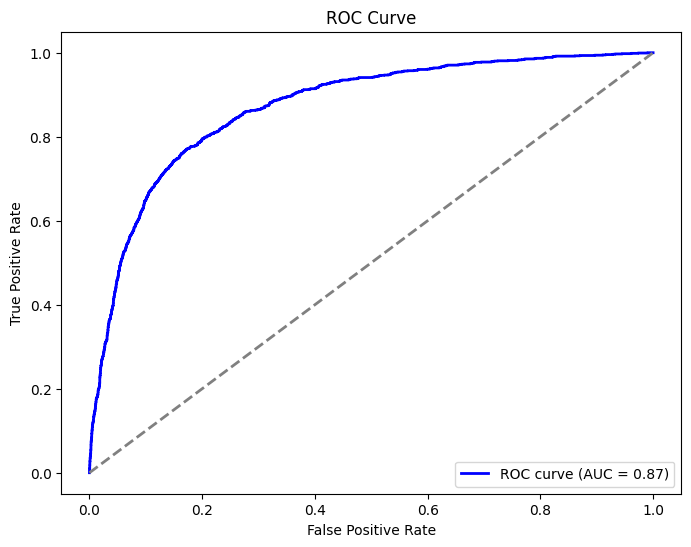

In [14]:
from sklearn.metrics import roc_curve, auc

# Generate predicted probabilities for the positive class (class 1)
y_prob_smote = model_smote.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_smote)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Insights from baseline model so far:**

Precision: Precision measures the proportion of true positive predictions among all positive predictions. For class 0 (not receiving the H1N1 vaccine), the precision is high (0.93), indicating that when the model predicts an individual won't receive the vaccine, it's correct 93% of the time. For class 1 (receiving the H1N1 vaccine), the precision is lower (0.53), suggesting that when the model predicts an individual will receive the vaccine, it's correct 53% of the time.

Recall: Recall (also known as sensitivity) measures the proportion of true positives that were correctly identified by the model. For class 0, the recall is 0.79, indicating that the model correctly identifies 79% of those who didn't receive the vaccine. For class 1, the recall is higher at 0.80, suggesting that the model identifies 80% of those who did receive the vaccine.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.85, and for class 1, it's 0.64.

Support: Support indicates the number of actual occurrences of each class in the test data. It can help in understanding the distribution of the target variable in the test set. For class 0, the support is 4539, and for class 1, it's 1354.

Mean CV Score: The mean cross-validation score is 0.818, which indicates the average accuracy of the model across multiple folds in the cross-validation process.
It suggests that the model performs consistently well across different subsets of the data.
The rest of the classification metrics have also improved with cross validation

ROC Curve AUC (Area Under the Curve): The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. The Area Under the ROC Curve (AUC) quantifies the model's ability to distinguish between the positive and negative classes. An AUC of 0.87 indicates that the model has good discriminatory power, with an 87% chance that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

Overall, the model trained on the SMOTE-resampled data seems to perform reasonably well, with high precision and recall for class 0 and moderate precision and recall for class 1. The mean cross-validation score and ROC curve AUC further support the model's effectiveness in predicting H1N1 vaccine recipients.



**Improving Model Performance**

The current model is okay, but it's still not good enough for our needs. Our current model has a lot of features and this may lead to the model capturing too much noise and irrelevant patterns (overfitting). This can lead to poor model performance.

We'll therefore perform feature selection. We'll do this through elastic net regularization. We'll use elastic net because it combines both L1 and L2 regularization hence has optimal bias-variance tradeoff

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Define the logistic regression model with Elastic Net regularization
# LogisticRegressionCV automatically performs cross-validation to find the best regularization parameters
model_elastic_net = LogisticRegressionCV(
    penalty='elasticnet',           # Use Elastic Net regularization
    solver='saga',                  # 'saga' solver supports Elastic Net regularization
    l1_ratios=[0.5],                # Set the ratio of L1 regularization (0.5 means equal L1 and L2)
    cv=5,                           # 5-fold cross-validation
    random_state=42                 # Set random state for reproducibility
)

# Train the logistic regression model with Elastic Net regularization on the SMOTE-resampled data
model_elastic_net.fit(X_train_smote, y_train_smote)


LogisticRegressionCV(cv=5, l1_ratios=[0.5], penalty='elasticnet',
                     random_state=42, solver='saga')

Accuracy (Elastic Net): 0.7936534871881894
Confusion Matrix (Elastic Net):
[[3591  948]
 [ 268 1086]]
Classification Report (Elastic Net):
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4539
           1       0.53      0.80      0.64      1354

    accuracy                           0.79      5893
   macro avg       0.73      0.80      0.75      5893
weighted avg       0.84      0.79      0.81      5893

ROC AUC (Elastic Net): 0.8708727545256065


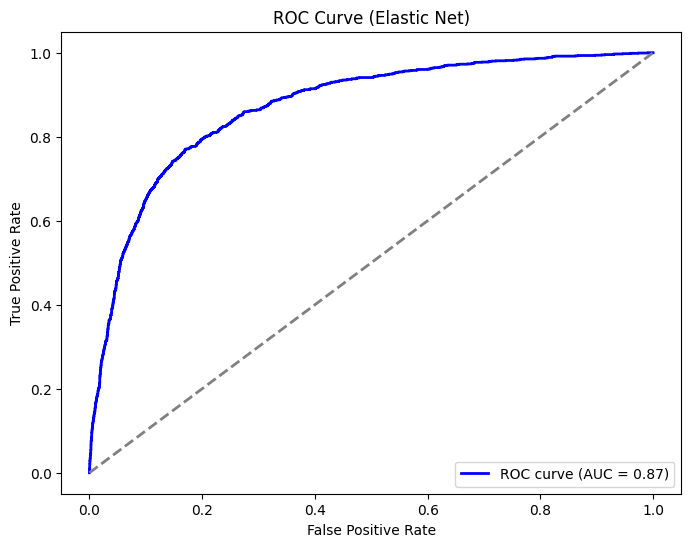

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Make predictions on the test set
y_pred_elastic_net = model_elastic_net.predict(X_test)

# Calculate probabilities for positive class (class 1)
y_prob_elastic_net = model_elastic_net.predict_proba(X_test)[:, 1]

# Evaluate accuracy
accuracy_elastic_net = model_elastic_net.score(X_test, y_test)
print("Accuracy (Elastic Net):", accuracy_elastic_net)

# Print confusion matrix
print("Confusion Matrix (Elastic Net):")
print(confusion_matrix(y_test, y_pred_elastic_net))

# Print classification report
print("Classification Report (Elastic Net):")
print(classification_report(y_test, y_pred_elastic_net))

# Calculate ROC AUC score
roc_auc_elastic_net = roc_auc_score(y_test, y_prob_elastic_net)
print("ROC AUC (Elastic Net):", roc_auc_elastic_net)

# Plot ROC curve
fpr_elastic_net, tpr_elastic_net, _ = roc_curve(y_test, y_prob_elastic_net)
plt.figure(figsize=(8, 6))
plt.plot(fpr_elastic_net, tpr_elastic_net, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_elastic_net)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Elastic Net)')
plt.legend(loc='lower right')
plt.show()


Now let's try another classification algorithm

# DECISION TREES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Select the target variable
target = 'h1n1_vaccine'

# Step 2: Select the features
features = df.drop(columns=['h1n1_vaccine'])

# Step 3: Handle missing values
# Separate numerical and categorical features
numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

# Fill missing values
features[numerical_features] = features[numerical_features].fillna(features[numerical_features].median())
features[categorical_features] = features[categorical_features].fillna(features[categorical_features].mode().iloc[0])

# Step 4: Encode categorical variables
features = pd.get_dummies(features, columns=categorical_features)

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Step 6: Build and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.7671163145838635,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.84      0.85      3029\n           1       0.49      0.52      0.51       900\n\n    accuracy                           0.77      3929\n   macro avg       0.67      0.68      0.68      3929\nweighted avg       0.77      0.77      0.77      3929\n')

Hyperparameter tuning to improve model performance

Accuracy: 0.8078391448205651
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      3029
           1       0.59      0.54      0.56       900

    accuracy                           0.81      3929
   macro avg       0.73      0.72      0.72      3929
weighted avg       0.80      0.81      0.81      3929



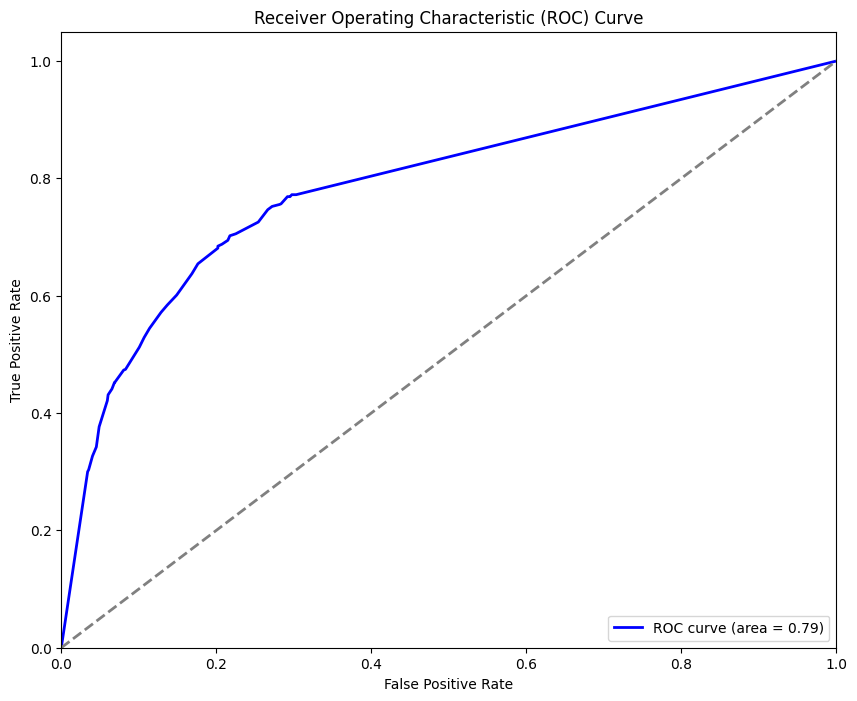

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Select the target variable
target = 'h1n1_vaccine'

# Select the features and handle missing values
features = df.drop(columns=['h1n1_vaccine'])
numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

features[numerical_features] = features[numerical_features].fillna(features[numerical_features].median())
features[categorical_features] = features[categorical_features].fillna(features[categorical_features].mode().iloc[0])

# Encode categorical variables
features = pd.get_dummies(features, columns=categorical_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Define the best hyperparameters obtained from Grid Search
best_params = {
    'max_depth': 20,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'criterion': 'entropy'
}

# Train the Decision Tree model with the best parameters
model = DecisionTreeClassifier(random_state=42, **best_params)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Plot the ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-validation Score: 0.8323050242696277


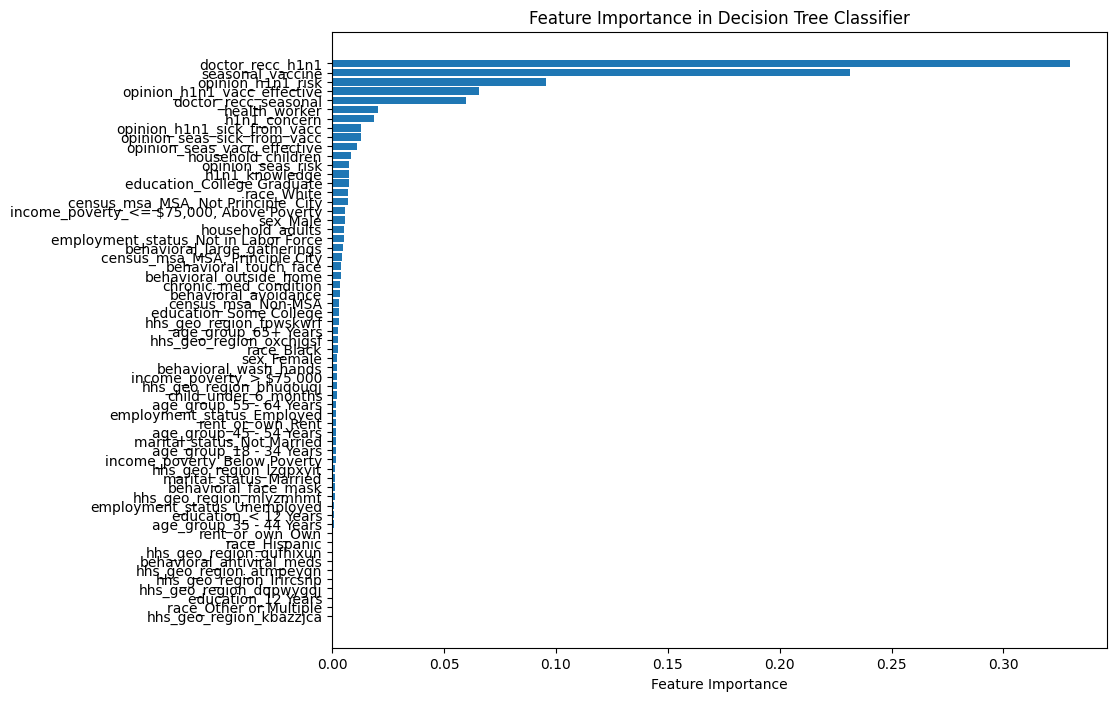

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Train the decision tree classifier with the best parameters (if available)
model = DecisionTreeClassifier(random_state=42, **best_params)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()


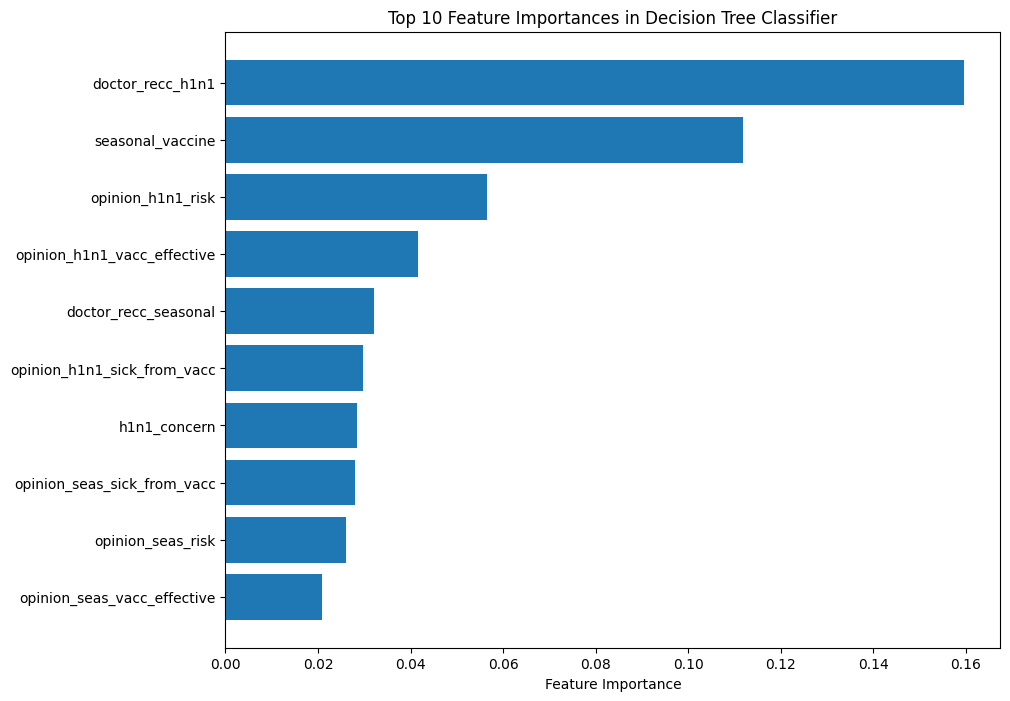

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Assuming best_params is a dictionary containing the best hyperparameters found
# For now, we will use default parameters. If you have best_params, use:
# model = DecisionTreeClassifier(random_state=42, **best_params)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order and get the top 10
sorted_indices = np.argsort(feature_importances)[::-1][:10]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances in Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()


From the classifier we can see that doctor_recc_h1n1, seasonal_vaccine, opinion_h1n1 risk and doctor_recc_seasonal were the most important features for predicting h1n1 vaccine use.

# K NEAREST NEIGHBOR

Accuracy: 0.7966403665054721
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      3029
           1       0.61      0.31      0.41       900

    accuracy                           0.80      3929
   macro avg       0.72      0.63      0.64      3929
weighted avg       0.77      0.80      0.77      3929



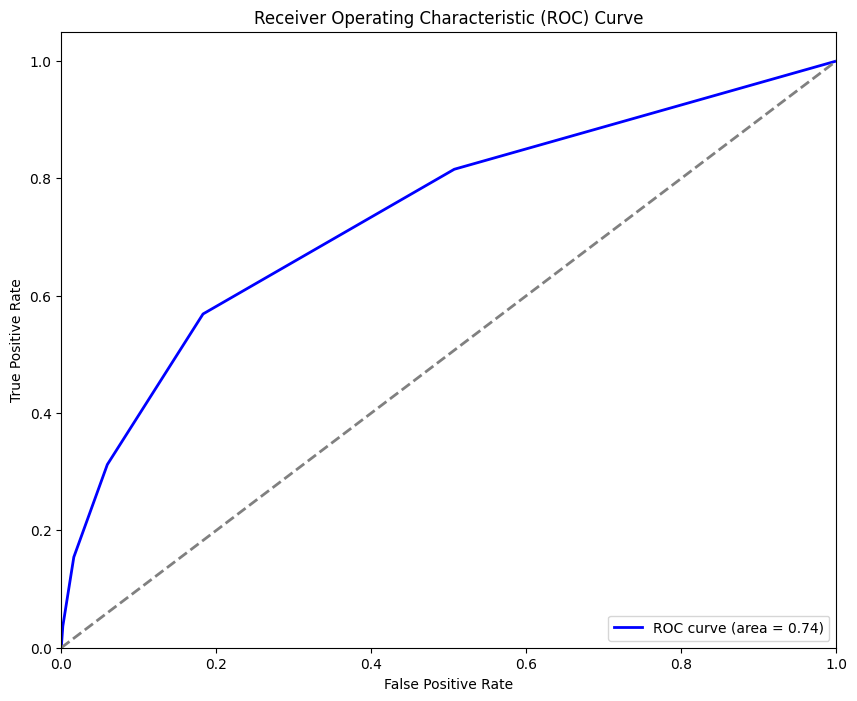

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Select the target variable
target = 'h1n1_vaccine'

# Select the features and handle missing values
features = df.drop(columns=['h1n1_vaccine'])
numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

features[numerical_features] = features[numerical_features].fillna(features[numerical_features].median())
features[categorical_features] = features[categorical_features].fillna(features[categorical_features].mode().iloc[0])

# Encode categorical variables
features = pd.get_dummies(features, columns=categorical_features)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df[target], test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Plot the ROC curve
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


KNN Hyperparameter Tuning

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best Cross-validation Score: 0.8116207437015117
Accuracy: 0.8055484856197506
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88      3029
           1       0.67      0.29      0.41       900

    accuracy                           0.81      3929
   macro avg       0.75      0.63      0.65      3929
weighted avg       0.79      0.81      0.77      3929



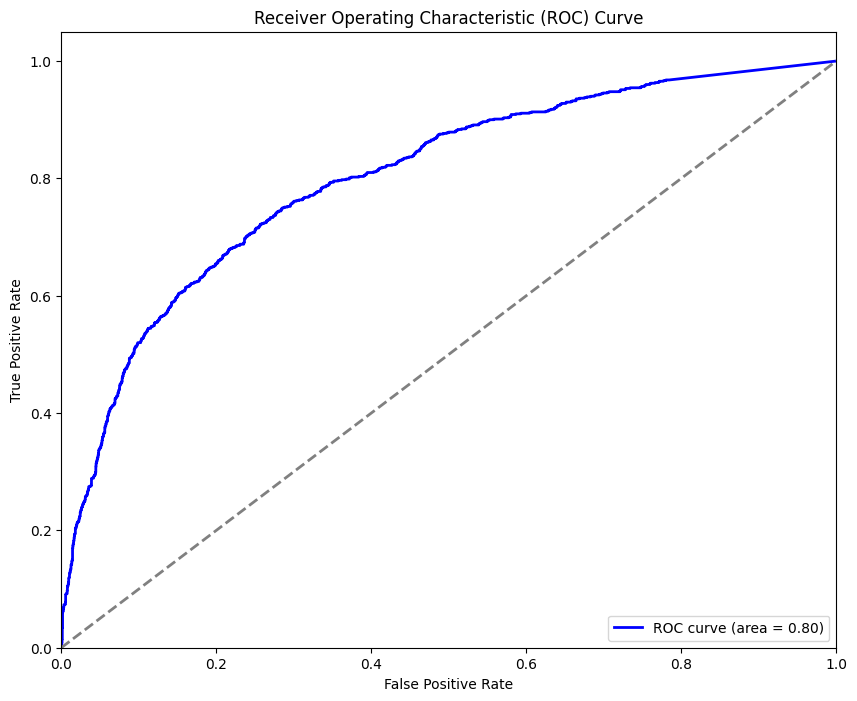

In [ ]:
# Select the target variable
target = 'h1n1_vaccine'

# Select the features and handle missing values
features = df.drop(columns=['h1n1_vaccine'])
numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

features[numerical_features] = features[numerical_features].fillna(features[numerical_features].median())
features[categorical_features] = features[categorical_features].fillna(features[categorical_features].mode().iloc[0])

# Encode categorical variables
features = pd.get_dummies(features, columns=categorical_features)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df[target], test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Score:", best_score)

# Train the KNN model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Plot the ROC curve
y_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


XG Boost

Accuracy: 0.8360906082972767
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      3029
           1       0.66      0.57      0.62       900

    accuracy                           0.84      3929
   macro avg       0.77      0.74      0.76      3929
weighted avg       0.83      0.84      0.83      3929



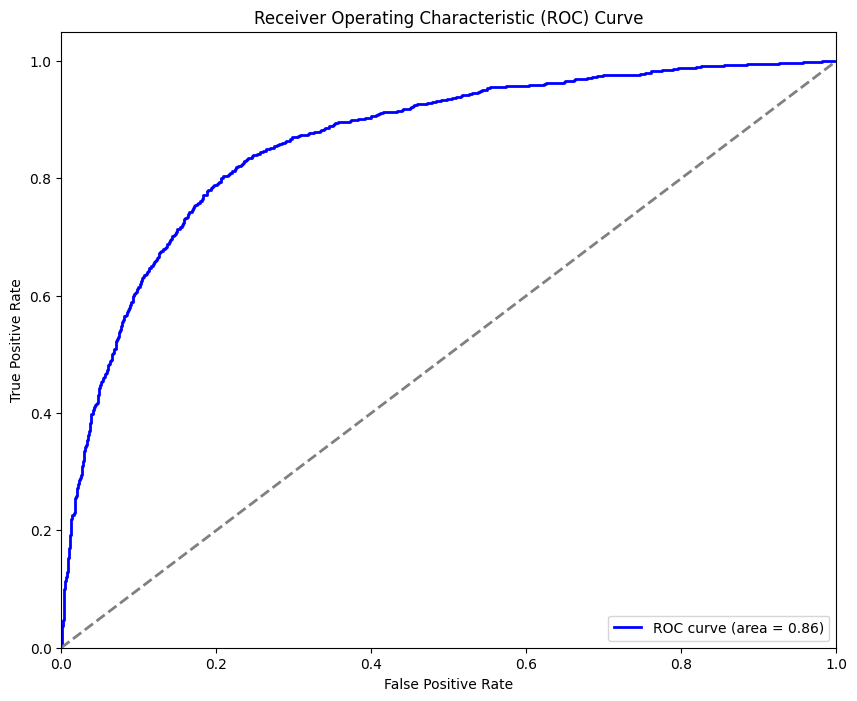

In [ ]:
import re
import xgboost as xgb

# Select the target variable
target = 'h1n1_vaccine'

# Select the features and handle missing values
features = df.drop(columns=['h1n1_vaccine'])
numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

features[numerical_features] = features[numerical_features].fillna(features[numerical_features].median())
features[categorical_features] = features[categorical_features].fillna(features[categorical_features].mode().iloc[0])

# Encode categorical variables
features = pd.get_dummies(features, columns=categorical_features)

# Clean feature names
features.columns = [re.sub('[^A-Za-z0-9_]+', '_', col) for col in features.columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Plot the ROC curve
y_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Best performance was oberved after XGboost